### Kết nối Google Drive lấy Dataset

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Cài đặt thư viện cần thiết

In [2]:
import os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.model_selection import train_test_split
import cv2
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

### Tổ chức dữ liệu

In [3]:
IMAGE_TRAIN_PATH = '/content/drive/MyDrive/Fresh_Fruit_Detection/Dataset_Final/train/images/'

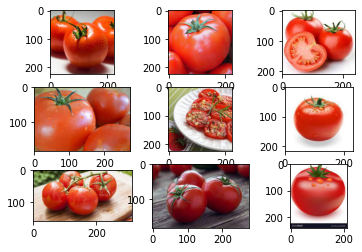

In [5]:
images_train_ls = os.listdir(IMAGE_TRAIN_PATH)
exemple_ls = filter(lambda x: 'fresh-tomato' in x, images_train_ls)
exemple_ls = list(exemple_ls)[:10]

for i in range(9):
    plt.subplot(330 + 1 + i)
    file_name = os.path.join(IMAGE_TRAIN_PATH, exemple_ls[i])
    image = plt.imread(file_name)
    plt.imshow(image)

plt.show()

In [6]:
fruit_name = ['apple','avocado','banana','guava','mango','orange','pear','tomato']

dataset = []

for img in tqdm(os.listdir(IMAGE_TRAIN_PATH)):
    img_arr = cv2.imread(os.path.join(IMAGE_TRAIN_PATH, img))
    img_arr = cv2.resize(img_arr, (64, 64))

    status, name, _ = img.split('-')
    index_status = 8 if status == 'rotten' else 0
    index_class = fruit_name.index(name) + index_status

    dataset.append([img_arr, index_class])

100%|██████████| 1620/1620 [00:25<00:00, 62.52it/s] 


In [18]:
X = []
y = []

for features, label in dataset:
    X.append(features)
    y.append(label)

X = np.array(X).reshape(1620, 64, 64, 3)
X = X/255.0

y = to_categorical(y)

In [19]:
X.shape, y.shape

((1620, 64, 64, 3), (1620, 16))

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Xây dựng mô hình CNN

In [21]:
import tensorflow as tf
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, BatchNormalization
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D

model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))


model.add(Flatten())  

model.add(Dense(128))

model.add(Dropout(0.25))

model.add(Dense(16))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 activation_4 (Activation)   (None, 62, 62, 32)        0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 activation_5 (Activation)   (None, 29, 29, 64)        0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                  

In [22]:
history = model.fit(X_train, y_train, validation_split=0.2, epochs=20, batch_size = 16)

Epoch 1/20
65/65 [==============================] - 6s 81ms/step - loss: 2.4584 - accuracy: 0.1544 - val_loss: 2.2753 - val_accuracy: 0.2077
Epoch 2/20
65/65 [==============================] - 5s 79ms/step - loss: 1.9192 - accuracy: 0.3465 - val_loss: 1.8123 - val_accuracy: 0.4231
Epoch 3/20
65/65 [==============================] - 5s 80ms/step - loss: 1.6827 - accuracy: 0.4440 - val_loss: 1.7010 - val_accuracy: 0.4308
Epoch 4/20
65/65 [==============================] - 5s 81ms/step - loss: 1.4302 - accuracy: 0.5068 - val_loss: 1.5588 - val_accuracy: 0.5077
Epoch 5/20
65/65 [==============================] - 5s 79ms/step - loss: 1.2662 - accuracy: 0.5840 - val_loss: 1.2711 - val_accuracy: 0.5808
Epoch 6/20
65/65 [==============================] - 5s 79ms/step - loss: 1.0175 - accuracy: 0.6689 - val_loss: 1.1648 - val_accuracy: 0.6462
Epoch 7/20
65/65 [==============================] - 5s 80ms/step - loss: 0.8709 - accuracy: 0.6979 - val_loss: 1.0896 - val_accuracy: 0.6500
Epoch 8/20
65

In [24]:
model.save('Fresh_Fruit_CNN_Model.h5')

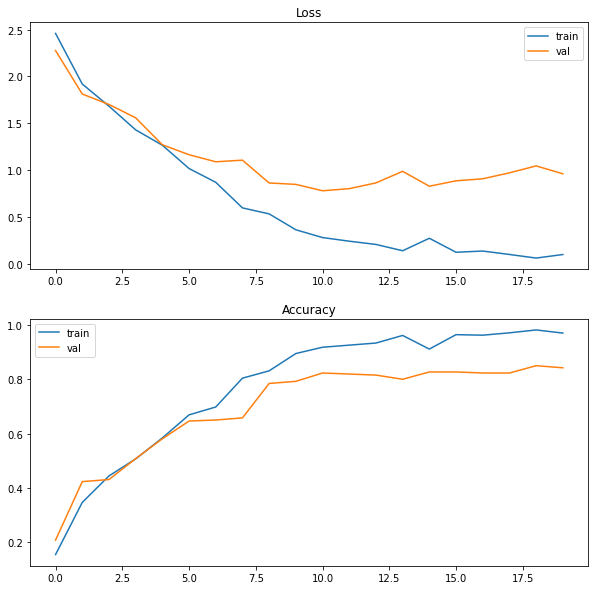

In [26]:
plt.figure(figsize=(10,10))
plt.subplot(211)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.legend()

plt.subplot(212)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.legend()
plt.show()

In [27]:
a = 74
y_pre = model.predict(np.expand_dims(X_test[a],axis=0))
print(y_test[a])
print(np.argmax(y_pre))

1/1 [==============================] - 0s 79ms/step
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
6
